# 로지스틱 회귀

이진 분류: 두 개의 선택지 중에서 정답을 고르는 문제  
이진 분류를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)가 있다.  
  
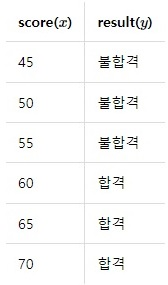  
  
점수별 합격 여부를 결정하는 것도 이진 분류중 하나다. 이진 분류는 0과 1로 표현 가능하므로 이를 그래프로 그리면 아래와 같다.  
  
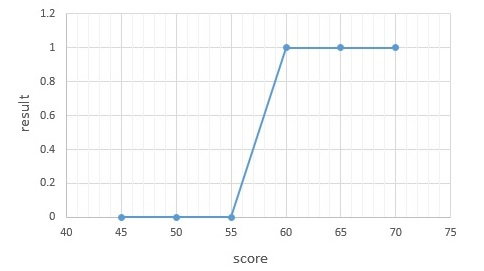  
  
이 그래프는 y=wx+b로 표현되지 않는다. 이 그래프처럼 s자 모양의 그래프를 만들려면 y=f(wx+b)와 같이 특정 함수가 추가적으로 필요한데 이것이 시그모이드(sigmoid) 함수다.  
  
1. 시그모이드 함수(sigmoid function)  
  
시그모이드 방정식  
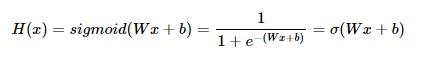  
  
선형 회귀에서와 마찬가지로 로지스틱 회귀에서도 적절한 w와 b를 찾는 것이 목적이다. 
  
  
  
  

In [1]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립사용

In [2]:
def sigmoid(x): # 시그모이드 함수 정의
    return 1/(1+np.exp(-x))

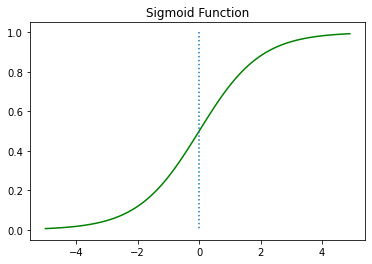

In [3]:
#W가 1이고 b가 0인 그래프

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

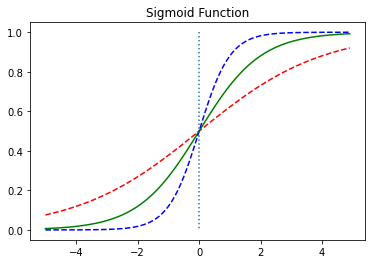

In [4]:
# W값의 변화에 따른 경사도의 변화

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

W의 값이 0.5일때 빨간색선  
W의 값이 1일때는 초록색선  
W의 값이 2일때 파란색선  
  
w의 값이 커지면 경사가 커지고 w의 값이 작아지면 경사가 작아진다.  
선형 회귀에서 가중치 w는 직선의 기울기를 의미했지만, 여기서는 그래프의 경사도를 결정한다. 

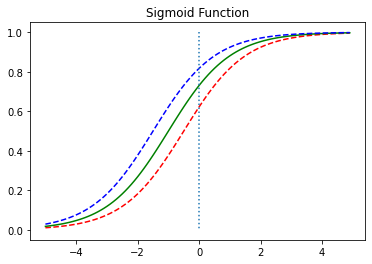

In [5]:
# b값의 변화에 따른 좌, 우 이동

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

시그모이드 함수는 입력값이 한없이 커지면 1에 수렴하고, 입력값이 한없이 작아지면 0에 수렴한다. 시그모이드 함수의 출력값은 0과 1 사이의 값을 가지는데 이 특성을 분류 작업에 활용한다.  

2. 비용함수  
선형회귀에서 사용했던 비용함수는 시그모이드에 적합치 않음  
  
실제값이 1일 때 예측값이 0에 가까워지면 오차가 커져야 하고, 실제값이 0일 때, 예측값이 1에 가까워지면 오차가 커져야 하는데 이를 충족하는 함수가 바로 로그 함수다. 다음은 y=0.5에 대칭하는 두 개의 로그 함수 그래프다.  
  
  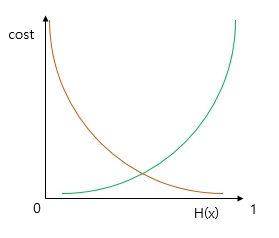  
실제값이 1일 때의 그래프를 주황색 선으로, 실제값이 0일 때의 그래프를 초록색 선으로 표현.  
  
실제값이 1일때, 예측값인 H(x)의 값이 1이면 오차가 0이므로 당연히 cost는 0이다. 반면, H(x)가 0으로 수렴하면 cost는 무한대로 발산한다. 이를 수식으로 표현하면 다음과 같다.  
  
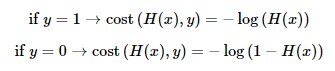  

이를 하나로 통합하면 다음 수식이 된다.  
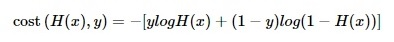  
  
평균 제곱 오차를 계산하면 다음과 같다.  
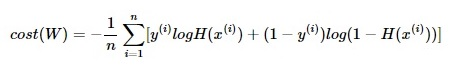  
  
경사 하강법 수식은 동일하다.  
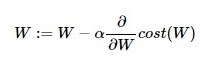
  
3. 파이토치로 로지스틱 회귀 구현하기  


In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [25]:
torch.manual_seed(1)

In [26]:
# x_train과 y_train을 텐서로 정의

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [27]:
x_train

tensor([[1., 2.],
        [2., 3.],
        [3., 1.],
        [4., 3.],
        [5., 3.],
        [6., 2.]])

In [28]:
y_train

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])

In [29]:
# 가중치와 편향 정의

W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

In [30]:
# 시그모이드 함수 가설 정의

#hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [31]:
# 현재 w, b 모두 0으로 초기화 되어 있으므로 
hypothesis

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)

In [32]:
# 오차 계산
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))

In [33]:
losses

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)

In [34]:
# 오차 평균
cost = losses.mean()
cost

tensor(0.6931, grad_fn=<MeanBackward0>)

In [35]:
# 파이토치 로지스틱 회귀의 비용 함수

F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

In [36]:
# 전체 코드

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [37]:
# 예측 

hypothesis = torch.sigmoid(x_train.matmul(W) + b)
hypothesis

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)

In [38]:
# 예측이 0.5보다 크면 True, 아니면 False로 표현할 수 있다 

prediction = hypothesis >= torch.FloatTensor([0.5])
prediction

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])

In [40]:
W

tensor([[3.2530],
        [1.5179]], requires_grad=True)

In [41]:
b

tensor([-14.4819], requires_grad=True)

# 파이토치 nn.Module로 구현하는 로지스틱 회귀

로지스틱 회귀는 선형회귀 y=wx+b를 시그모이드 함수에 적용하므로 y=sigmoid(wx+b) 로 표현할 수 있다. 이를 파이토치 라이브러리 함수로 적용하면 nn.Linear()의 결과를 nn.Sigmoid()를 거치게하면 된다.  
  

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [17]:
torch.manual_seed(1)

In [18]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [19]:
# nn.Sequential()은 nn.Module 층을 차례로 쌓는다

model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

In [20]:
# 학습전 예측
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward>)

In [21]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614851 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [22]:
# 학습후 예측
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)

In [23]:
list(model.parameters())

[Parameter containing:
 tensor([[3.2534, 1.5181]], requires_grad=True),
 Parameter containing:
 tensor([-14.4839], requires_grad=True)]

라이브러리를 사용했을때와 직접 로지스틱 회귀를 구현했을때의 w와 b의 값이 거의 비슷하다. 

* and 연산 로지스틱 회귀

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

x_train = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]])
y_train = torch.FloatTensor([[0], [0], [0], [1]])

model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.801665 Accuracy 25.00%
Epoch   10/1000 Cost: 0.432759 Accuracy 75.00%
Epoch   20/1000 Cost: 0.344833 Accuracy 100.00%
Epoch   30/1000 Cost: 0.289105 Accuracy 100.00%
Epoch   40/1000 Cost: 0.250074 Accuracy 100.00%
Epoch   50/1000 Cost: 0.220866 Accuracy 100.00%
Epoch   60/1000 Cost: 0.198001 Accuracy 100.00%
Epoch   70/1000 Cost: 0.179517 Accuracy 100.00%
Epoch   80/1000 Cost: 0.164214 Accuracy 100.00%
Epoch   90/1000 Cost: 0.151310 Accuracy 100.00%
Epoch  100/1000 Cost: 0.140267 Accuracy 100.00%
Epoch  110/1000 Cost: 0.130701 Accuracy 100.00%
Epoch  120/1000 Cost: 0.122332 Accuracy 100.00%
Epoch  130/1000 Cost: 0.114947 Accuracy 100.00%
Epoch  140/1000 Cost: 0.108381 Accuracy 100.00%
Epoch  150/1000 Cost: 0.102505 Accuracy 100.00%
Epoch  160/1000 Cost: 0.097216 Accuracy 100.00%
Epoch  170/1000 Cost: 0.092430 Accuracy 100.00%
Epoch  180/1000 Cost: 0.088081 Accuracy 100.00%
Epoch  190/1000 Cost: 0.084110 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080472 Accuracy 10

In [4]:
pred = model(torch.FloatTensor([[1, 1]]))
print(pred>=0.5)

tensor([[True]])


* 타이타닉 생존자 예측  
  
PassengerId: 승객 번호  
Survived: 생존여부(정답)	 
Pclass: 룸등급	 
Name: 이름	
Sex: 성별	 
Age: 나이	 
SibSp /Parch: 동행자 수	  
Ticket: 티켓번호	
Fare: 요금	
Cabin: 캐비넷 번호	
Embarked: 정박 항구  
  
문제: 속성(x값들)을 이용해서 생존 예측  
데이터 전처리: 빈칸 처리, 불필요한 컬럼 누락, 스케일링 ....  
모델 생성  
학습  
예측  
평가   

In [31]:
import numpy as np
import pandas as pd

df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
a = df['Age'].mean()  #나이의 전체 평균값
a

29.69911764705882

In [6]:
b = df['Age'].median() #나이의 중위값
b

28.0

In [32]:
df['Age'].fillna(df['Age'].median(), inplace=True) # inplace=True로 설정하면 원본 데이터프레임이 변환됨

In [9]:
df['Age'].isnull().sum()

0

In [10]:
df['Embarked'].value_counts()  # 컬럼의 값 별로 개수를 반환

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
df['Embarked'].fillna('S', inplace=True)

In [12]:
df['Embarked'].isnull().sum()

0

In [13]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
df.drop('Cabin', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [35]:
df['Alone'] = np.where((df['SibSp']+df['Parch'])>0, 0, 1)
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,1
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,28.0,23.4500,S,0
889,1,1,male,26.0,30.0000,C,1


In [36]:
df2 = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'])
df2

,Survived,Age,Fare,Alone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,0,1,0,1,0,0,1
1,1,38.0,71.2833,0,1,0,0,1,0,1,0,0
2,1,26.0,7.9250,1,0,0,1,1,0,0,0,1
3,1,35.0,53.1000,0,1,0,0,1,0,0,0,1
4,0,35.0,8.0500,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,0,1,0,0,1
887,1,19.0,30.0000,1,1,0,0,1,0,0,0,1
888,0,28.0,23.4500,0,0,0,1,1,0,0,0,1
889,1,26.0,30.0000,1,1,0,0,0,1,1,0,0


In [37]:
df2.drop('Sex_female', axis=1, inplace=True)
df2

,Survived,Age,Fare,Alone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,0,1,1,0,0,1
1,1,38.0,71.2833,0,1,0,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,0,1
3,1,35.0,53.1000,0,1,0,0,0,0,0,1
4,0,35.0,8.0500,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,1,0,0,1
887,1,19.0,30.0000,1,1,0,0,0,0,0,1
888,0,28.0,23.4500,0,0,0,1,0,0,0,1
889,1,26.0,30.0000,1,1,0,0,1,1,0,0


In [38]:
# pclass의 원 핫 인코딩 생성
df2[['Pclass_1','Pclass_2','Pclass_3']].values

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

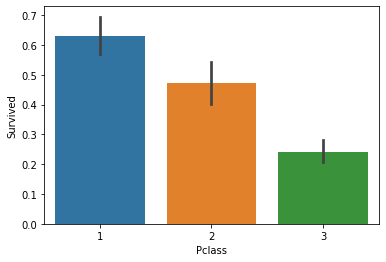

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action='ignore') #워닝 안뜨게 설정

sns.barplot('Pclass', 'Survived', data=df)
plt.show()

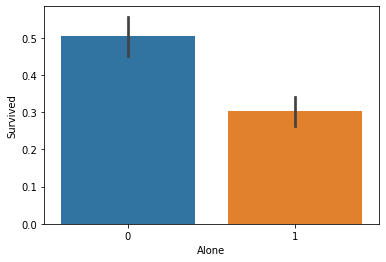

In [40]:
sns.barplot('Alone', 'Survived', data=df)
plt.show()

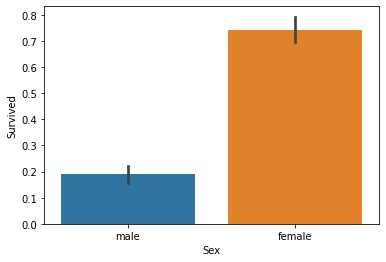

In [41]:
sns.barplot('Sex', 'Survived', data=df)
plt.show()

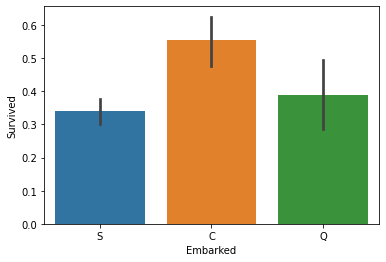

In [42]:
sns.barplot('Embarked', 'Survived', data=df)
plt.show()

In [45]:
x_data = df2.drop('Survived', axis=1)  # 학습할 속성 추출
x_data

,Age,Fare,Alone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,0,1,1,0,0,1
1,38.0,71.2833,0,1,0,0,0,1,0,0
2,26.0,7.9250,1,0,0,1,0,0,0,1
3,35.0,53.1000,0,1,0,0,0,0,0,1
4,35.0,8.0500,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,1,0,1,0,1,0,0,1
887,19.0,30.0000,1,1,0,0,0,0,0,1
888,28.0,23.4500,0,0,0,1,0,0,0,1
889,26.0,30.0000,1,1,0,0,1,1,0,0


In [48]:
y_data = df2[['Survived']]  # 학습할 정답 추출
y_data

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

x_train = torch.FloatTensor(x_data.values)
y_train = torch.FloatTensor(y_data.values)

In [50]:
x_train

tensor([[22.0000,  7.2500,  0.0000,  ...,  0.0000,  0.0000,  1.0000],
        [38.0000, 71.2833,  0.0000,  ...,  1.0000,  0.0000,  0.0000],
        [26.0000,  7.9250,  1.0000,  ...,  0.0000,  0.0000,  1.0000],
        ...,
        [28.0000, 23.4500,  0.0000,  ...,  0.0000,  0.0000,  1.0000],
        [26.0000, 30.0000,  1.0000,  ...,  1.0000,  0.0000,  0.0000],
        [32.0000,  7.7500,  1.0000,  ...,  0.0000,  1.0000,  0.0000]])

In [51]:
y_train

tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
      

In [57]:
# 로지스틱 회귀 모델 생성. 리니어와 시그모이드 연결
model = nn.Sequential(nn.Linear(10, 1), nn.Sigmoid())

optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 2000
for e in range(epochs):
    h = model(x_train) #예측
    cost = F.binary_cross_entropy(h, y_train) #예측결과과 정답 사이의 차를 계산
    
    optimizer.zero_grad() #optimizer 초기화
    cost.backward()  #역방향으로 진행하면서 비용 최소 위치 찾아감
    optimizer.step() #찾은 위치에서의 w, b의 값으로 변경
    
    if e%100==0:
        pred = h >= 0.5  #예측한 결과가 0.5이상인지를 True, False로 표현
        ok = (pred.float() == y_train)  #ok배열은 True(정답맞춤)/Flase(못맞춤)로 구성됨
        acc = (ok.sum().item()/len(ok))*100
        print(e, '.', ' /cost:', cost.item(), ' /acc:', acc)
        

0 .  /cost: 10.161212921142578  /acc: 38.38383838383838
100 .  /cost: 9.98385238647461  /acc: 69.1358024691358
200 .  /cost: 12.023300170898438  /acc: 64.19753086419753
300 .  /cost: 7.746018886566162  /acc: 67.78900112233445
400 .  /cost: 8.587970733642578  /acc: 63.86083052749719
500 .  /cost: 6.870943069458008  /acc: 65.20763187429854
600 .  /cost: 10.056546211242676  /acc: 67.003367003367
700 .  /cost: 9.37574577331543  /acc: 69.1358024691358
800 .  /cost: 5.010992050170898  /acc: 68.46240179573513
900 .  /cost: 5.488565444946289  /acc: 65.20763187429854
1000 .  /cost: 11.456619262695312  /acc: 69.02356902356902
1100 .  /cost: 8.503678321838379  /acc: 69.24803591470258
1200 .  /cost: 7.510700702667236  /acc: 69.92143658810326
1300 .  /cost: 8.468880653381348  /acc: 61.61616161616161
1400 .  /cost: 8.99139404296875  /acc: 69.6969696969697
1500 .  /cost: 34.084537506103516  /acc: 38.38383838383838
1600 .  /cost: 12.82535171508789  /acc: 65.54433221099887
1700 .  /cost: 12.63270282745

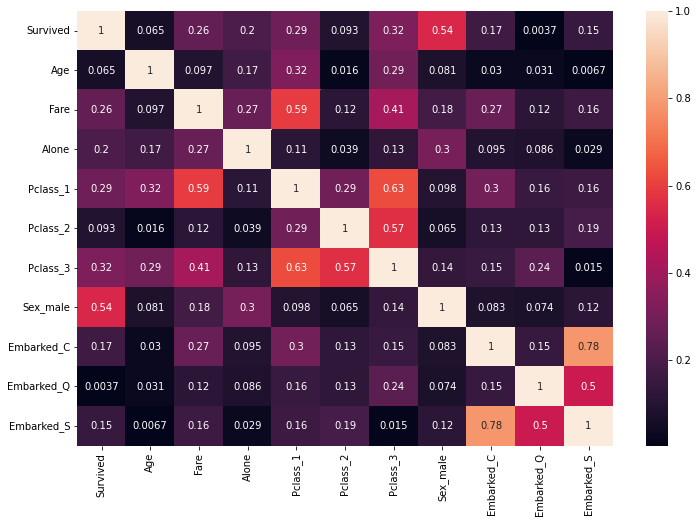

In [61]:
plt.subplots(figsize=(12, 8))
sns.heatmap(df2.corr().abs(), annot=True)
plt.show()

In [63]:
x_data = df2[['Fare', 'Pclass_1', 'Pclass_2', 'Sex_male', 'Embarked_C', 'Embarked_Q']]
y_data = df2[['Survived']]

x_train = torch.FloatTensor(x_data.values)
y_train = torch.FloatTensor(y_data.values)

In [65]:
# 로지스틱 회귀 모델 생성. 리니어와 시그모이드 연결
model = nn.Sequential(nn.Linear(6, 1), nn.Sigmoid())

optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 2000
for e in range(epochs):
    h = model(x_train) #예측
    cost = F.binary_cross_entropy(h, y_train) #예측결과과 정답 사이의 차를 계산
    
    optimizer.zero_grad() #optimizer 초기화
    cost.backward()  #역방향으로 진행하면서 비용 최소 위치 찾아감
    optimizer.step() #찾은 위치에서의 w, b의 값으로 변경
    
    if e%100==0:
        pred = h >= 0.5  #예측한 결과가 0.5이상인지를 True, False로 표현
        ok = (pred.float() == y_train)  #ok배열은 True(정답맞춤)/Flase(못맞춤)로 구성됨
        acc = (ok.sum().item()/len(ok))*100
        print(e, '.', ' /cost:', cost.item(), ' /acc:', acc)

0 .  /cost: 9.496644020080566  /acc: 39.84287317620651
100 .  /cost: 5.646878719329834  /acc: 61.61616161616161
200 .  /cost: 7.78891134262085  /acc: 67.11560044893379
300 .  /cost: 1.3908039331436157  /acc: 68.01346801346801
400 .  /cost: 3.4663751125335693  /acc: 69.36026936026936
500 .  /cost: 8.802453994750977  /acc: 69.36026936026936
600 .  /cost: 1.6058287620544434  /acc: 68.68686868686868
700 .  /cost: 1.9587299823760986  /acc: 70.14590347923682
800 .  /cost: 19.101625442504883  /acc: 62.40179573512907
900 .  /cost: 2.0814225673675537  /acc: 71.2682379349046
1000 .  /cost: 20.33903694152832  /acc: 61.05499438832772
1100 .  /cost: 4.204665184020996  /acc: 72.16610549943884
1200 .  /cost: 13.79504108428955  /acc: 64.3097643097643
1300 .  /cost: 2.271803379058838  /acc: 71.49270482603815
1400 .  /cost: 20.350074768066406  /acc: 61.39169472502806
1500 .  /cost: 8.264307975769043  /acc: 69.24803591470258
1600 .  /cost: 1.5866020917892456  /acc: 70.2581369248036
1700 .  /cost: 20.2972

* titanic_test.csv 파일을 읽어서 테스팅 하라.  
학습과 동일한 컬럼만 추출하여 위에서 생성한 모델로 결과 예측해서 정답률을 출력하시오  

In [66]:
import numpy as np
import pandas as pd

df_test = pd.read_csv('titanic_test.csv')
df_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [67]:
df_test.drop('PassengerId', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)
df_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [70]:
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

In [71]:
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)
df_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,27.0,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,27.0,0,0,8.0500,S


In [72]:
df_test.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [73]:
df_test['Alone'] = np.where((df_test['SibSp']+df_test['Parch'])>0, 0, 1)
df_test.drop('SibSp', axis=1, inplace=True)
df_test.drop('Parch', axis=1, inplace=True)

df_test = pd.get_dummies(df_test, columns=['Pclass', 'Sex', 'Embarked'])
df_test

,Survived,Age,Fare,Alone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,34.5,7.8292,1,0,0,1,0,1,0,1,0
1,1,47.0,7.0000,0,0,0,1,1,0,0,0,1
2,0,62.0,9.6875,1,0,1,0,0,1,0,1,0
3,0,27.0,8.6625,1,0,0,1,0,1,0,0,1
4,1,22.0,12.2875,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,27.0,8.0500,1,0,0,1,0,1,0,0,1
414,1,39.0,108.9000,1,1,0,0,1,0,1,0,0
415,0,38.5,7.2500,1,0,0,1,0,1,0,0,1
416,0,27.0,8.0500,1,0,0,1,0,1,0,0,1


In [74]:
x_data2 = df_test[['Fare', 'Pclass_1', 'Pclass_2', 'Sex_male', 'Embarked_C', 'Embarked_Q']]
y_data2 = df_test[['Survived']]

x_test = torch.FloatTensor(x_data2.values)
y_test = torch.FloatTensor(y_data2.values)

In [75]:
h = model(x_test)  # 학습한 model로 시험치름
pred = h >= 0.5  #예측한 결과가 0.5이상인지를 True, False로 표현
ok = (pred.float() == y_test)  #ok배열은 True(정답맞춤)/Flase(못맞춤)로 구성됨
acc = (ok.sum().item()/len(ok))*100
print( '테스트 acc:', acc)

테스트 acc: 65.78947368421053
